In [1]:
import pickle

# load in data
with (open('dataset.pkl', "rb")) as openfile:
     df_file2 = pickle.load(openfile)

C:\Users\pooja\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pooja\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\pooja\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df_file2.head() # view data

,0,1,2,3,4,5
0,player_0,0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]",9
1,player_1,1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]",1
2,player_0,2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]",7
3,player_1,3,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]",0
4,player_0,4,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]",6


In [3]:
df_file2.columns = ['player_id', 'game_turn', 'observation', 'reward', 'action_mask', 'action'] # set column names of data

In [4]:
# imports

import pandas as pd
pd.options.display.max_seq_items = 2000
import numpy as np

In [5]:
# decode first card colour from observation vector

def define_player_card(row):
#     obs = row['observation']
#     idx_pos = np.nonzero(obs[:10])
#     if idx_pos in [0,1,2,3,4]:
#         return 1
#     else: return 0
    
    obs = row['observation']
    if len(np.unique(obs[:10])) > 1:
        idx_pos = int(np.where(obs[:10])[0]) 
        if idx_pos in [0,1,2,3,4]: return 1
        else: return 0
    else : return -1 

df_file2["card0_colour"] = df_file2.apply(define_player_card, axis=1)

In [6]:
# decode first card rank from observation vector

def define_player_card_rank(row):
    obs = row['observation']
    idx_pos = np.where(obs[:10])[0]
    if idx_pos in range(5,10):
        idx_pos =  np.where(obs[5:10])[0]
    return int(idx_pos[0]) + 1 

df_file2["card0_rank"] = df_file2.apply(define_player_card_rank, axis=1)

In [7]:
# decode second card colour from observation vector

def define_player_card1_colour(row):
    obs = row['observation']
    if len(np.unique(obs[10:20])) > 1:
        idx_pos = int(np.where(obs[10:20])[0]) 
#         print(idx_pos)
        if idx_pos in [0,1,2,3,4]: return 1
        else: return 0
    else : return -1 

df_file2["card1_colour"] = df_file2.apply(define_player_card1_colour, axis=1)

In [8]:
# decode second card rank from observation vector

def define_player_card1_rank(row):
    obs = row['observation']
    if len(np.unique(obs[10:20])) > 1:
        idx_pos = np.where(obs[10:20])[0]
        if int(idx_pos[0]) in range(5,10):
            idx_pos =  np.where(obs[15:20])[0]
        return int(idx_pos[0]) + 1 
    else : return -1

df_file2["card1_rank"] = df_file2.apply(define_player_card1_rank, axis=1)

In [9]:
# decode red fireworks formed from observation vector

def define_firework_red(row):
    obs = row['observation']
    if len(np.unique(obs[38:43])) > 1:
        idx_pos = int(np.where(obs[38:43])[0]) 
        return idx_pos + 1
    else : return 0 

df_file2["red_firework"] = df_file2.apply(define_firework_red, axis=1)    

In [10]:
# decode yellow fireworks formed from observation vector

def define_firework_yellow(row):
    obs = row['observation']
    if len(np.unique(obs[43:48])) > 1:
        idx_pos = int(np.where(obs[43:48])[0]) 
        return idx_pos + 1
    else : return 0 

df_file2["yel_firework"] = df_file2.apply(define_firework_yellow, axis=1)   

In [11]:
# decode number of information tokens left from observation vector

def define_info_token(row):
    obs = row['observation'][48:51]
    if (obs == [1,1,1]).all(): return 3
    elif (obs == [0,0,0]).all(): return 0
    elif (obs == [1,1,0]).all(): return 2
    else: return 1

df_file2["info_tokens"] = df_file2.apply(define_info_token, axis=1)

In [12]:
df_file2.head() # view data

,player_id,game_turn,observation,reward,action_mask,action,card0_colour,card0_rank,card1_colour,card1_rank,red_firework,yel_firework,info_tokens
0,player_0,0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]",9,1,4,1,4,0,0,3
1,player_1,1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]",1,1,3,0,2,0,0,2
2,player_0,2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]",7,1,4,1,2,0,0,3
3,player_1,3,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]",0,1,3,0,2,0,0,2
4,player_0,4,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]",6,1,2,1,1,0,0,3


In [13]:
# define state norm based on game turn == 0, card rank of 1 and action taken

def define_state_norm(row):
    if row['game_turn'] == 0:
        if (row['card0_rank'] == 1 or row['card1_rank'] == 1) and row['action'] == 6: return 1
#         elif (row['card0_rank'] == 1 or row['card1_rank'] == 1) and row['action'] != 6: return 0
        else : return 0
    else: return 2

df_file2["state_norm"] = df_file2.apply(define_state_norm, axis=1)

In [14]:
df_file2["state_norm"].value_counts() # view distribution of state norm

2    1582345
1      25895
0      24105
Name: state_norm, dtype: int64

In [15]:
# define action norm based on the actions taken

def define_action_norm(row):
    if row['action'] in range(6, 11):
        return 1
    elif row['action'] in range(4, 6): return 0
    else: return 2
    

df_file2["action_norm"] = df_file2.apply(define_action_norm, axis=1)

In [16]:
df_file2["action_norm"].value_counts() # view distribution of action norm

2    937880
1    457507
0    236958
Name: action_norm, dtype: int64

In [17]:
df_file2["shift_action"] = df_file2["action"].shift(1, fill_value=-1) # shift the action column down by 1 

In [18]:
# define behaviour norm based on previous action and the current action

def define_behaviour_norm(row):
    if row['shift_action'] in range(4,6):
        if row['action'] in range(0,2): return 1
        else : return 0
    else : return 2
    

df_file2["behaviour_norm"] = df_file2.apply(define_behaviour_norm, axis=1)

In [19]:
df_file2.groupby('action_norm')['action'].value_counts() # view distribution of actions grouped by action norm

action_norm  action
0            4         121961
             5         114997
1            7         118290
             6         118252
             8         111276
             9          76128
             10         33561
2            1         306156
             0         283426
             3         141748
             2         106550
Name: action, dtype: int64

In [20]:
df_file2.columns # view columns

Index(['player_id', 'game_turn', 'observation', 'reward', 'action_mask',
       'action', 'card0_colour', 'card0_rank', 'card1_colour', 'card1_rank',
       'red_firework', 'yel_firework', 'info_tokens', 'state_norm',
       'action_norm', 'shift_action', 'behaviour_norm'],
      dtype='object')

In [21]:
df_file = df_file2.drop(['player_id', 'game_turn', 'reward', 'action_mask', 'card0_colour', 'card0_rank',
                      'card1_colour', 'card1_rank', 'red_firework', 'yel_firework', 'info_tokens', 'shift_action'], axis=1) # drop columns

In [22]:
from sklearn.utils import shuffle

df_file = shuffle(df_file) # shuffle data

In [23]:
df_file.head() # view data 

,observation,action,state_norm,action_norm,behaviour_norm
887665,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,2,2,2
283638,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",3,2,2,2
437024,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,2,0,2
730087,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",8,2,1,2
381685,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,2,2,1


In [24]:
df_file.shape # view shape of data

(1632345, 5)

In [25]:
df = df_file # copy

In [26]:
df['observation'] = df['observation'].apply(tuple) # change to tuple to drop duplicates

# drop duplicates without keeping any duplicate data
d2 = df.drop_duplicates(subset = ['observation', 'action', 'state_norm', 'action_norm', 'behaviour_norm'], keep = False) 

In [27]:
d2.shape # view shape of data

(1271544, 5)

In [28]:
d2['action_norm'].value_counts() # view distribution of action norm after removing duplicates

2    750849
1    306448
0    214247
Name: action_norm, dtype: int64

In [29]:
d2['state_norm'].value_counts() # view distribution of state norm after removing duplicates

2    1271544
Name: state_norm, dtype: int64

In [30]:
d2['behaviour_norm'].value_counts() # # view distribution of behaviour norm after removing duplicates

2    1057885
1     182084
0      31575
Name: behaviour_norm, dtype: int64

In [31]:
d2.shape # view shape of data

(1271544, 5)

In [32]:
df_state_1 = df_file2.loc[df_file2['state_norm'] == 1 ] # extract data with state norm == 1
df_state_0 = df_file2.loc[df_file2['state_norm'] == 0 ] # extract data with state norm == 0

In [33]:
df_norm_final = df_file2.loc[d2.index, :]  # get data

In [34]:
df_norm_final.shape # view data shape

(1271544, 17)

In [35]:
# concatenate state norm == 1 & 0 with data that has no duplicates

df_norm_final = pd.concat([df_norm_final, df_state_1, df_state_0], axis = 0) 

In [36]:
df_norm_final['state_norm'].value_counts() # view distribution of state norm after adding duplicates for state norm

2    1271544
1      25895
0      24105
Name: state_norm, dtype: int64

In [37]:
df_norm_final['action_norm'].value_counts() # view distribution of action norm after adding duplicates for state norm

2    750849
1    355871
0    214824
Name: action_norm, dtype: int64

In [38]:
df_norm_final['behaviour_norm'].value_counts() # view distribution of behaviour norm after adding duplicates for state norm

2    1107885
1     182084
0      31575
Name: behaviour_norm, dtype: int64

In [39]:
df_norm_final.shape  # view data shape

(1321544, 17)

In [40]:
df_norm_final.head() # view data

,player_id,game_turn,observation,reward,action_mask,action,card0_colour,card0_rank,card1_colour,card1_rank,red_firework,yel_firework,info_tokens,state_norm,action_norm,shift_action,behaviour_norm
887665,player_1,19,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]",0,1,3,1,2,2,3,1,2,2,8,2
283638,player_1,21,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1]",3,1,5,1,1,1,2,1,2,2,7,2
437024,player_1,23,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]",4,1,2,0,2,2,3,1,2,0,0,2
730087,player_0,24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]",8,0,3,1,1,2,2,1,2,1,0,2
381685,player_1,25,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]",0,1,3,0,1,1,3,0,2,2,4,1


In [41]:
df_norm_final.columns # view data columns

Index(['player_id', 'game_turn', 'observation', 'reward', 'action_mask',
       'action', 'card0_colour', 'card0_rank', 'card1_colour', 'card1_rank',
       'red_firework', 'yel_firework', 'info_tokens', 'state_norm',
       'action_norm', 'shift_action', 'behaviour_norm'],
      dtype='object')

In [42]:
df_norm_final2 = df_norm_final.drop(['player_id', 'game_turn', 'reward', 'action_mask', 'card0_colour', 'card0_rank',
                      'card1_colour', 'card1_rank', 'red_firework', 'yel_firework', 'info_tokens', 'shift_action'], axis = 1) # drop columns

In [43]:
df_norm_final2.head() # view data 

,observation,action,state_norm,action_norm,behaviour_norm
887665,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,2,2,2
283638,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",3,2,2,2
437024,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,2,0,2
730087,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",8,2,1,2
381685,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,2,2,1


In [106]:
df_norm_final2.to_pickle('norm_data_no_duplicates.pkl') # save data with no duplicates to pickle file

In [110]:
df_norm_final2.groupby('behaviour_norm')['action'].value_counts() # view action distribution based on behaviour norm

behaviour_norm  action
0               2           8601
                5           4140
                4           3716
                7           1853
                9           1465
                8           1464
                6           1059
                10           851
                3             99
1               1          92372
                0          89712
2               1         164055
                0         146377
                4         106612
                8         103293
                5         100356
                3          97659
                7          83898
                2          75948
                6          75153
                9          59074
                10         27761
Name: action, dtype: int64

In [52]:
df_file.groupby('action_norm')['action'].value_counts() #  # view action distribution based on action norm

action_norm  action
0            4         121961
             5         114997
1            7         118290
             6         118252
             8         111276
             9          76128
             10         33561
2            1         306156
             0         283426
             3         141748
             2         106550
Name: action, dtype: int64

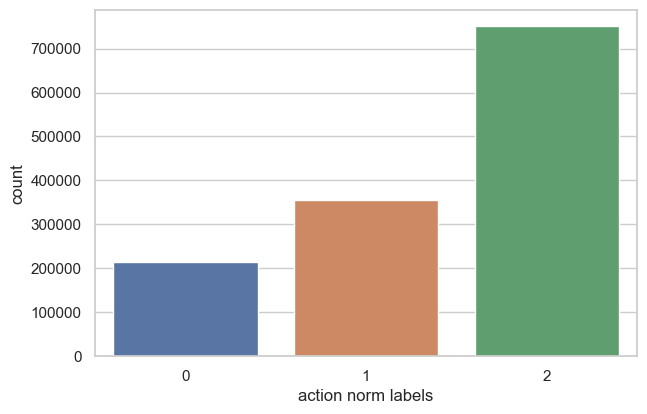

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# plot count values of action norm

plt.figure(figsize = (7, 4.5))
sns.countplot(x=df_norm_final2["action_norm"])
plt.xlabel('action norm labels')
# plt.title('Count of Action Norm Values')
plt.savefig('action_norm.png')
plt.show()

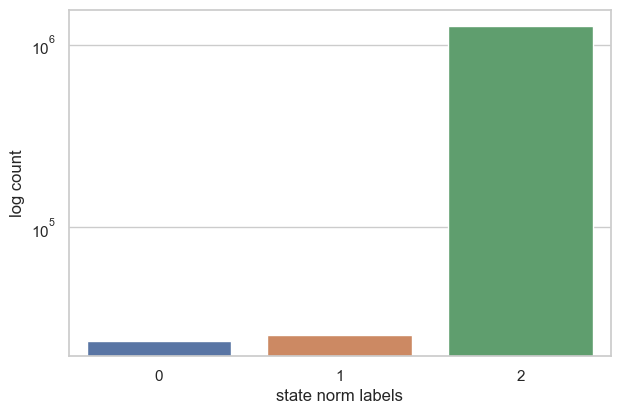

In [47]:
# plot log count values of state norm

plt.figure(figsize = (7, 4.5))
sns.countplot(x=df_norm_final2["state_norm"])
plt.xlabel('state norm labels')
plt.ylabel('log count')
# plt.title('Count of State Norm Values')
plt.yscale('log')
plt.savefig('state_norm.png')
plt.show()

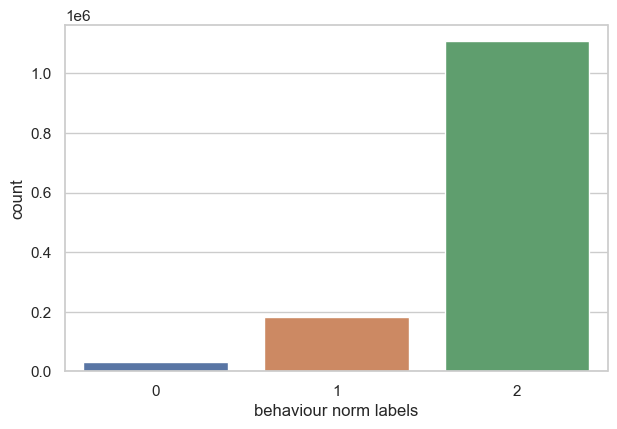

In [48]:
# plot count values of behaviour norm

plt.figure(figsize = (7, 4.5))
sns.countplot(x=df_norm_final2["behaviour_norm"])
plt.xlabel('behaviour norm labels')
# plt.ylabel('log count')
# plt.title('Count of Behaviour Norm Values')
# plt.yscale('log')
plt.savefig('behaviour_norm.png')
plt.show()

In [43]:
df_file.to_pickle('norm_data.pkl') # save data to pickle file

In [22]:
from sklearn.utils import shuffle
df = shuffle(df_file2) # shuffle data